#  **Marine Route Optimization Using Machine Learning**

# 1. Data Collection and Preprocessing

In [1]:
# Imports 

import requests # for making HTTP requests

import zipfile # fro working with zip files

import os # for interacting with OS

import pandas as pd

import ftplib # for FTP operations

from getpass import getpass #to securely input a password

import xarray as xr # for working with multi-dimentional arrays and datasets

import numpy as np

from datetime import datetime, timedelta 

import matplotlib.pyplot as plt

STEP 1: Collect data

AIS and CMEMS data for the model on:

* 01.01.2023
* 01.04.2023
* 01.07.2023
* 01.10.2023

CMEMS data for the routing on:

* 01.06.2023
* 02.06.2023
* 03.06.2023

# **Model data- AIS**

In [2]:
import requests
import zipfile
import os
import time

'''urls = [
    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2023/AIS_2023_01_01.zip",
    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2023/AIS_2023_04_01.zip",
    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip",
    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip"
]

def download_file(url, max_retries=5):
    for attempt in range(max_retries):
        try:
            print(f"Downloading {url} (Attempt {attempt+1}/{max_retries})...")
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            filename = url.split('/')[-1]
            with open(filename, "wb") as file:
                file.write(response.content)
            print(f"Downloaded: {filename}")
            return filename  # Return the filename if successful
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            time.sleep(5)  # Wait before retrying
    print(f"Failed to download {url} after {max_retries} attempts.")
    return None

def extract_zip(filename):
    try:
        with zipfile.ZipFile(filename, "r") as z:
            z.extractall()
        print(f"Extracted: {filename}")
        os.remove(filename)
    except zipfile.BadZipFile:
        print(f"Invalid ZIP file: {filename}")

for url in urls:
    file = download_file(url)
    if file:
        extract_zip(file)

print("Download completed!")
'''

'urls = [\n    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2023/AIS_2023_01_01.zip",\n    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2023/AIS_2023_04_01.zip",\n    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip",\n    "https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip"\n]\n\ndef download_file(url, max_retries=5):\n    for attempt in range(max_retries):\n        try:\n            print(f"Downloading {url} (Attempt {attempt+1}/{max_retries})...")\n            response = requests.get(url, timeout=10)\n            response.raise_for_status()\n            filename = url.split(\'/\')[-1]\n            with open(filename, "wb") as file:\n                file.write(response.content)\n            print(f"Downloaded: {filename}")\n            return filename  # Return the filename if successful\n        except requests.exceptions.RequestException as e:\n            print(f"Error: {e}")\n            time.sleep(5)  # Wait before ret

Here, we define a list called 'urls' that contain 4 URLs pointing to ZIP files. These ZIP files contain data related to AIS (Automatic Identification System.)

Next, we beging a loop to process each URL in the 'urls' list. 
Inside the loop, it sends an **HTTP GET** request to the URL specified by url using the **requests.get method**. 
It then extracts the last part of the URL (the filename) by splitting the URL using / and selecting the last element.

Now, we are creating a new binary file with the same filename and writing the content of an HTTP response ('**r.content**') into that file. 

Next, we open the downloaded file as a ZIP archive using '**zipfile.ZipFile**'. If successful, it extrracts all the contents of the file to the current directoey using '**z.extractall()**'. If the extraction is succesful, it prints "Extracted file", and then the original ZIP file is removed using '**os.remove**'. If there's an issue with the opening the ZIP file, it prints "Invalid file"

In [3]:
# Read csv and create df

'''ais_data = pd.DataFrame()

for url in urls:
    
    filename = url.split('/')[-1]
    filename = filename.replace("zip", "csv")
    filepath = '/kaggle/working/' + filename  

    data = pd.read_csv(filepath)
    ais_data = pd.concat([ais_data, data], ignore_index=True)  # Concatenate DataFrames.

print("Before preprocessing...")
ais_data
'''

'ais_data = pd.DataFrame()\n\nfor url in urls:\n    \n    filename = url.split(\'/\')[-1]\n    filename = filename.replace("zip", "csv")\n    filepath = \'/kaggle/working/\' + filename  \n\n    data = pd.read_csv(filepath)\n    ais_data = pd.concat([ais_data, data], ignore_index=True)  # Concatenate DataFrames.\n\nprint("Before preprocessing...")\nais_data\n'

The goal here is to read CSV file and concatenate them into the 'ais_data' DataFrame.

We convert here the ZIP extension to CSV.
Then we read the CSV file located at the 'filepath' and the data is loaded into a new pandas DataFrame 'data'.

Next,the '**data**' DataFrame is concatenated with the '**ais_data**' DataFrame. The '**ignore_index=True**' argument ensures that the resulting DataFrame has a continuous index, as opposed to retaining the original indices from the individual DataFrames.

In [4]:
# Save AIS data to file

#ais_data.to_csv('/kaggle/working/ais_data_all.csv')

In [5]:
ais_data_all= pd.read_csv('/kaggle/input/ais-all-data-jan01-apr04-2023/ais_data_all.csv')

In [6]:
ais_data_all

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,0,368926035.0,2023-01-01T00:00:05,38.65165,-90.17964,0.1,360.0,511.0,KIMMSWICK,NaN,AENA,33.0,15.0,NaN,NaN,NaN,33.0,A
1,1,367647050.0,2023-01-01T00:00:04,30.16506,-90.99936,6.3,161.4,511.0,USS CAIRO,NaN,WDH7325,31.0,0.0,20.0,NaN,NaN,31.0,A
2,2,352001704.0,2023-01-01T00:00:04,28.91963,-94.37033,14.7,97.5,97.0,ENEOS EXPLORER,IMO9935492,3E2723,80.0,0.0,230.0,36.0,11.7,80.0,A
3,3,367104060.0,2023-01-01T00:00:00,34.33537,-119.56046,14.8,202.9,511.0,ALAN T,IMO8982577,WDC9571,60.0,15.0,28.0,7.0,NaN,0.0,A
4,4,367099730.0,2023-01-01T00:00:02,26.53889,-97.40485,0.0,360.0,511.0,JESSIE M,NaN,WDJ2892,52.0,0.0,0.0,0.0,0.0,52.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697630,16697630,369970924.0,2023-04-01T01:51:03,13.45201,144.64005,0.9,246.1,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697631,16697631,369970924.0,2023-04-01T01:54:27,13.45196,144.64294,1.9,95.4,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697632,16697632,369970924.0,2023-04-01T02:16:21,13.45288,144.64331,5.7,5.4,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697633,16697633,369970924.0,2023-04-01T02:20:26,13.45346,144.63248,13.9,263.9,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B


# Model data - CMEMS

Downloading the data for the 2 days.

In [7]:

"""
ds1 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_salinity0.083deg_PT1H-m_1698425838731.nc')
ds2 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_theato0.083deg_PT1H-m_1698426299513.nc')
ds3 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_thickness_0.083deg_P1D-m_1698437256627.nc')


# Concatenation (if datasets have the same variables and dimensions)
phy_jan = xr.merge([ds1, ds2, ds3])

phy_jan.to_netcdf('jan_phy.nc')
"""

"\nds1 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_salinity0.083deg_PT1H-m_1698425838731.nc')\nds2 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_theato0.083deg_PT1H-m_1698426299513.nc')\nds3 = xr.open_dataset('/kaggle/input/jan2023-phy-ocean/cmems_mod_glo_phy_anfc_thickness_0.083deg_P1D-m_1698437256627.nc')\n\n\n# Concatenation (if datasets have the same variables and dimensions)\nphy_jan = xr.merge([ds1, ds2, ds3])\n\nphy_jan.to_netcdf('jan_phy.nc')\n"

In [8]:
phy_jan = xr.open_dataset('/kaggle/input/final-phy-jan-2023/jan_phy.nc')
phy_jan

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 2041, time: 25, longitude: 4320)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-01-01T00:30:00 ... 2023-01-01T23:30:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
Attributes: (12/13)
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    area:              Global
    Conventions:       CF-1.8
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    ...                ...
    source:            MOI GLO12
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    institution:       Mercator Ocean International
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    comment:           
    history:           Data extracted from dataset http://localhost:8080/thre...

In [9]:
wav_jan = xr.open_dataset('/kaggle/input/global-wav-ocean-analysis-202301jan/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_1698305046266.nc')
wav_jan

<xarray.Dataset>
Dimensions:    (time: 8, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-01-01T21:00:00
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    VTPK       (time, latitude, longitude) float32 ...
    VHM0       (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
Attributes: (12/27)
    Conventions:                               CF-1.6
    time_coverage_start:                       20231103-03:00:00
    time_coverage_end:                         20231104-00:00:00
    date_created:                              20231025-07:42:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...
    title:                                     cmems_mod_glo_wav_anfc_0.083de...

# Downlaoding the data for 01 APRIL 2023



# **Physics Data**

In [10]:
#April jana combination
"""
ds1 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_salanity_0.083deg_PT1H-m_1698436627345.nc')
ds2 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_thetao_0.083deg_PT1H-m_1698437097509.nc')
ds3 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_thickness_0.083deg_P1D-m_1698442161874.nc')


# Concatenation (if datasets have the same variables and dimensions)
phy_apr = xr.merge([ds1, ds2, ds3])

phy_apr.to_netcdf('apr_phy.nc')"""

"\nds1 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_salanity_0.083deg_PT1H-m_1698436627345.nc')\nds2 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_thetao_0.083deg_PT1H-m_1698437097509.nc')\nds3 = xr.open_dataset('/kaggle/input/apr-phy2023/cmems_mod_glo_phy_anfc_thickness_0.083deg_P1D-m_1698442161874.nc')\n\n\n# Concatenation (if datasets have the same variables and dimensions)\nphy_apr = xr.merge([ds1, ds2, ds3])\n\nphy_apr.to_netcdf('apr_phy.nc')"

In [11]:
phy_apr = xr.open_dataset('/kaggle/input/final-phy-data-2023/apr_phy.nc')
phy_apr

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 2041, time: 25, longitude: 4320)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-04-01T00:30:00 ... 2023-04-01T23:30:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
Attributes: (12/13)
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    area:              Global
    Conventions:       CF-1.8
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    ...                ...
    source:            MOI GLO12
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    institution:       Mercator Ocean International
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    comment:           
    history:           Data extracted from dataset http://localhost:8080/thre...

#  **Wave Data**

In [12]:
wav_apr = xr.open_dataset('/kaggle/input/global-wav-ocean-analysis-202301apr/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_1698305442484.nc')
wav_apr


<xarray.Dataset>
Dimensions:    (time: 8, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-04-01 ... 2023-04-01T21:00:00
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    VTPK       (time, latitude, longitude) float32 ...
    VHM0       (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
Attributes: (12/27)
    Conventions:                               CF-1.6
    time_coverage_start:                       20231103-03:00:00
    time_coverage_end:                         20231104-00:00:00
    date_created:                              20231025-07:42:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...
    title:                                     cmems_mod_glo_wav_anfc_0.083de...

#  **Selecting ship route area**

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the bounding box coordinates
bbox = ((-65, 20), (-100, 43))

# Create a Matplotlib figure and axis with a specific Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features such as coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Set the map extent based on the bounding box
ax.set_extent([bbox[0][0], bbox[1][0], bbox[0][1], bbox[1][1]])

# Add text labels for country names and port names
label_properties = {
    'fontweight': 'normal',
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
}

# Define city and country labels with coordinates
labels = {
    'Washington': (-73.69, 40.82, 'USA', 'red'),
    
    'Havana': (-82.3, 23.1, 'Mexico', 'red'),
}

for city, (lon, lat, country, color) in labels.items():
    ax.text(lon, lat, city, color=color, **label_properties)
    ax.text(lon, lat - 1, country, color=color, **label_properties)

# Differentiate between land and ocean by setting colors
land = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='darkgrey')
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='lightblue')

ax.add_feature(land, zorder=0)
ax.add_feature(ocean, zorder=0)

# Add a title
plt.title("Shipping route area between port Dubai and Mumbai")

# Show the map
plt.show()


/opt/conda/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

<Figure size 640x480 with 1 Axes>

# **Reduce CMEMS wave data size by using bbox**

In [14]:

#bbox = ((-60, 20), (-120, 50))


def get_closest(array, value):
    return np.abs(array - value).argmin()
    
ds_wav_jan = wav_jan
ds_wav_apr = wav_apr


ds_wav_all = [ds_wav_jan, ds_wav_apr]

datasets_wav = []

for ds_month in ds_wav_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_wav_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_wav.append(ds_wav_month_reg)

ds_wav = xr.concat(datasets_wav, dim = 'time')
ds_wav



<xarray.Dataset>
Dimensions:    (time: 2, latitude: 276, longitude: 0)
Coordinates:
  * latitude   (latitude) float64 20.0 20.08 20.17 20.25 ... 42.75 42.83 42.92
  * time       (time) datetime64[ns] 2023-01-01 2023-04-01
  * longitude  (longitude) float64 
Data variables:
    VTPK       (time, latitude, longitude) float32 
    VHM0       (time, latitude, longitude) float32 
    VMDR       (time, latitude, longitude) float32 
Attributes: (12/27)
    Conventions:                               CF-1.6
    time_coverage_start:                       20231103-03:00:00
    time_coverage_end:                         20231104-00:00:00
    date_created:                              20231025-07:42:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...
    title:                                     cmems_mod_glo_wav_anfc_0.083de...

# **Reduce CMEMS physics data size by using bbox**

In [15]:
#bbox = ((-60, 20), (-120, 50))


ds_phy_jan =  phy_jan
ds_phy_apr =  phy_apr


ds_phy_all = [ds_phy_jan, ds_phy_apr]

datasets_phy = []

for ds_month in ds_phy_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_phy_month_reg = ds_month.isel(time = 0, longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_phy.append(ds_phy_month_reg)

ds_phy = xr.concat(datasets_phy, dim = 'time')
ds_phy


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 276, time: 2, longitude: 0)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 20.0 20.08 20.17 20.25 ... 42.75 42.83 42.92
  * time       (time) datetime64[ns] 2023-01-01T00:30:00 2023-04-01T00:30:00
  * longitude  (longitude) float32 
Data variables:
    so         (time, depth, latitude, longitude) float32 
    thetao     (time, depth, latitude, longitude) float32 
    mlotst     (time, latitude, longitude) float32 
Attributes: (12/13)
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    area:              Global
    Conventions:       CF-1.8
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    ...                ...
    source:            MOI GLO12
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    institution:       Mercator Ocean International
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    comment:           
    history:           Data extracted from dataset http://localhost:8080/thre...

In [16]:
# Join all wave products by using open_mfdataset, chunking data in response to memory issues
ds_wav_all = xr.open_mfdataset('/kaggle/input/wave-data/*.nc')

ds_wav_all

<xarray.Dataset>
Dimensions:    (time: 24, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-06-01T21:00:00
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    VTPK       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VHM0       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
    VMDR       (time, latitude, longitude) float32 dask.array<chunksize=(8, 2041, 4320), meta=np.ndarray>
Attributes: (12/27)
    Conventions:                               CF-1.6
    time_coverage_start:                       20231103-03:00:00
    time_coverage_end:                         20231104-00:00:00
    date_created:                              20231025-07:42:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...
    title:                                     cmems_mod_glo_wav_anfc_0.083de...

In [17]:
ds_phy_all = xr.open_mfdataset('/kaggle/input/phy-data/*.nc')
ds_phy_all

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 2041, time: 12, longitude: 4320)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-06-01T18:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(4, 1, 2041, 4320), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(4, 1, 2041, 4320), meta=np.ndarray>
Attributes: (12/19)
    title:                         Instantaneous fields for product GLOBAL_AN...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    compute_hosts:                 fidjim01-sihpc,fidjim02-sihpc,fidjim03-sih...
    n_workers:                     4
    sshcluster_timeout:            2700
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

# **Routing Data -  CMEMS**

In [18]:

phy_jun = xr.open_dataset('/kaggle/input/routing-ocean-physics-202301-june/cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i_1698267716666.nc')
phy_jun

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 2041, time: 4, longitude: 4320)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-06-01T18:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/19)
    title:                         Instantaneous fields for product GLOBAL_AN...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    compute_hosts:                 fidjim01-sihpc,fidjim02-sihpc,fidjim03-sih...
    n_workers:                     4
    sshcluster_timeout:            2700
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [19]:

wav_jun = xr.open_dataset('/kaggle/input/routing-ocean-wav-202301-june/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_1698308781382.nc')
wav_jun

<xarray.Dataset>
Dimensions:    (time: 8, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-06-01T21:00:00
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    VTPK       (time, latitude, longitude) float32 ...
    VHM0       (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
Attributes: (12/27)
    Conventions:                               CF-1.6
    time_coverage_start:                       20231103-03:00:00
    time_coverage_end:                         20231104-00:00:00
    date_created:                              20231025-07:42:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...
    title:                                     cmems_mod_glo_wav_anfc_0.083de...

# **STEP 2: Merge and Preprocess Model Data**


In general:

* Merge AIS data with CMEMS data
* Remove unneccessary columns (show estimated time, latitude, longitude, heading, SOG, COG, Gross Tonage, VHM0, VMDR, VTPK, Temperature, Salinity and Thickness)

For all data:

* Remove ships with Status =! 0 or Status =! 8
* Remove ships with SOG < 7 or SOG > 102.2
* Remove ships with latitude > 91 and longitude > 181
* Remove ships with latitude < -91 and longitude < -181
* Remove ships with heading > 361
* Round data base times
* Normalize all data to remove outliers
* Standardize between 0 and 1

In [20]:
study_data = pd.read_csv('/kaggle/input/ais-all-data-jan01-apr04-2023/ais_data_all.csv')
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,0,368926035.0,2023-01-01T00:00:05,38.65165,-90.17964,0.1,360.0,511.0,KIMMSWICK,NaN,AENA,33.0,15.0,NaN,NaN,NaN,33.0,A
1,1,367647050.0,2023-01-01T00:00:04,30.16506,-90.99936,6.3,161.4,511.0,USS CAIRO,NaN,WDH7325,31.0,0.0,20.0,NaN,NaN,31.0,A
2,2,352001704.0,2023-01-01T00:00:04,28.91963,-94.37033,14.7,97.5,97.0,ENEOS EXPLORER,IMO9935492,3E2723,80.0,0.0,230.0,36.0,11.7,80.0,A
3,3,367104060.0,2023-01-01T00:00:00,34.33537,-119.56046,14.8,202.9,511.0,ALAN T,IMO8982577,WDC9571,60.0,15.0,28.0,7.0,NaN,0.0,A
4,4,367099730.0,2023-01-01T00:00:02,26.53889,-97.40485,0.0,360.0,511.0,JESSIE M,NaN,WDJ2892,52.0,0.0,0.0,0.0,0.0,52.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697630,16697630,369970924.0,2023-04-01T01:51:03,13.45201,144.64005,0.9,246.1,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697631,16697631,369970924.0,2023-04-01T01:54:27,13.45196,144.64294,1.9,95.4,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697632,16697632,369970924.0,2023-04-01T02:16:21,13.45288,144.64331,5.7,5.4,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B
16697633,16697633,369970924.0,2023-04-01T02:20:26,13.45346,144.63248,13.9,263.9,511.0,NBG 10,IMO0000000,NaN,35.0,NaN,2.0,0.0,NaN,NaN,B


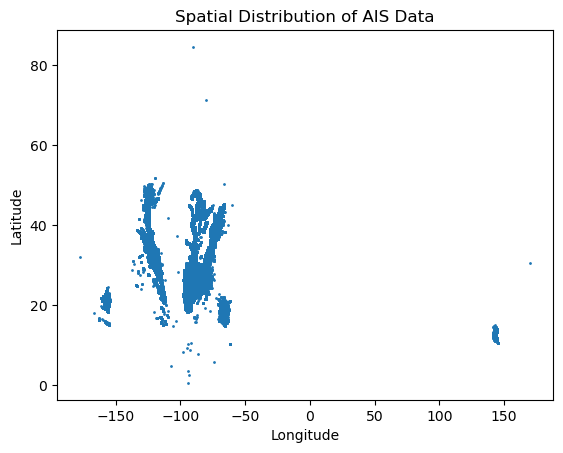

In [21]:
import matplotlib.pyplot as plt

# Scatter plot of 'LAT' and 'LON'
plt.scatter(study_data['LON'], study_data['LAT'], s=1)  # Adjust 's' for point size
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of AIS Data')
plt.show()


In [22]:
# Remove ships with status =! 0 and status =! 8
study_data = study_data[(study_data['Status'] == 0) | (study_data['Status'] == 8)].dropna()

# Remove ships with SOG < 5 or SOG > 102.2
study_data = study_data[(study_data['SOG'] > 7) & (study_data['SOG'] < 102.2)].dropna()

# Remove ships with latitude > 91 and longitude > 181
study_data = study_data[(study_data['LAT'] >= 20) & (study_data['LAT'] <= 43)].dropna()
study_data = study_data[(study_data['LON'] >= -87.5) & (study_data['LON'] <= -72.5)].dropna()

# Remove ships with heading > 361
study_data = study_data[(study_data['Heading'] < 361)].dropna()

# Calculate tonnage (Length * Breadth * Depth * S) - WE DON'T HAVE THE DEPTH
# According to https://cdn.shopify.com/s/files/1/1021/8837/files/Tonnage_Guide_1_-_Simplified_Measurement.pdf?1513
study_data['GrossTonnage'] = 0.67 * study_data['Length'] * study_data['Width']

study_data = study_data.reset_index(drop=True)
study_data


,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,GrossTonnage
0,61,311001094.0,2023-01-01T00:00:01,28.28428,-79.63630,24.6,0.8,2.0,CARNIVAL LEGEND,IMO9224726,C6FF2,60.0,0.0,293.0,40.0,8.2,60.0,A,7852.40
1,80,367469290.0,2023-01-01T00:00:05,25.88697,-80.05251,9.0,184.4,182.0,MAKO,IMO9579896,WDG9743,31.0,0.0,35.0,10.0,4.4,57.0,A,234.50
2,157,367341010.0,2023-01-01T00:00:03,41.79507,-87.44634,12.0,208.5,208.0,MANITOWOC,IMO7366398,WDE3569,70.0,0.0,192.0,20.0,7.8,70.0,A,2572.80
3,167,367703000.0,2023-01-01T00:00:02,24.02975,-81.70948,16.3,93.3,89.0,OVERSEAS LONG BEACH,IMO9353527,WAAT,80.0,0.0,183.0,32.0,12.2,80.0,A,3923.52
4,171,229099000.0,2023-01-01T00:00:04,23.87015,-83.77240,16.0,103.5,104.0,MINERVA CHIOS,IMO9877341,9HA5445,80.0,0.0,293.0,46.0,11.6,80.0,A,9030.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373403,16692230,538008899.0,2023-04-01T23:56:18,25.51555,-79.53770,12.5,180.9,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90
373404,16692314,636092602.0,2023-04-01T23:59:25,25.71019,-83.15791,10.2,3.4,1.0,VOGE MIA,IMO9464950,D5GV3,70.0,0.0,186.0,27.0,9.8,70.0,A,3364.74
373405,16692372,376609000.0,2023-04-01T23:58:52,29.39362,-80.81100,11.4,179.7,178.0,ALLEGRO,IMO9142447,J8B5341,70.0,0.0,98.0,16.0,5.9,79.0,A,1050.56
373406,16692504,538008899.0,2023-04-01T23:58:38,25.50736,-79.53787,12.5,181.2,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90


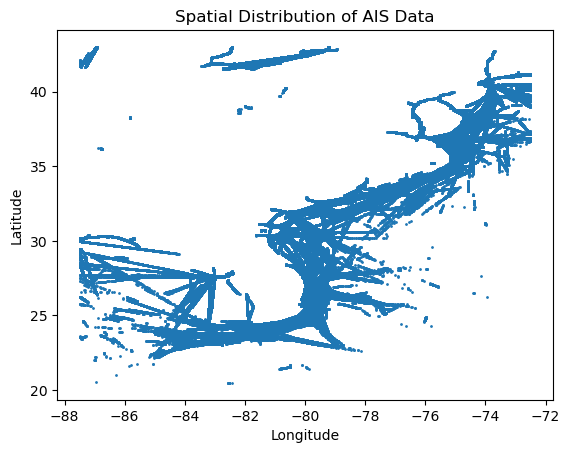

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of 'LAT' and 'LON'
plt.scatter(study_data['LON'], study_data['LAT'], s=1)  # Adjust 's' for point size
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of AIS Data')
plt.show()


Now we round the data base times.

In [24]:
from datetime import datetime, timedelta

def datetime_rounder(time_str):
    time = datetime.fromisoformat(time_str)
    rounded_time = time.replace(second=0, minute=0, hour=time.hour) + timedelta(minutes=time.minute // 30)
    return rounded_time.strftime('%y-%m-%d %H:%M:%S')

study_data['EstimatedTime'] = study_data['BaseDateTime'].apply(datetime_rounder)


In [25]:
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,GrossTonnage,EstimatedTime
0,61,311001094.0,2023-01-01T00:00:01,28.28428,-79.63630,24.6,0.8,2.0,CARNIVAL LEGEND,IMO9224726,C6FF2,60.0,0.0,293.0,40.0,8.2,60.0,A,7852.40,23-01-01 00:00:00
1,80,367469290.0,2023-01-01T00:00:05,25.88697,-80.05251,9.0,184.4,182.0,MAKO,IMO9579896,WDG9743,31.0,0.0,35.0,10.0,4.4,57.0,A,234.50,23-01-01 00:00:00
2,157,367341010.0,2023-01-01T00:00:03,41.79507,-87.44634,12.0,208.5,208.0,MANITOWOC,IMO7366398,WDE3569,70.0,0.0,192.0,20.0,7.8,70.0,A,2572.80,23-01-01 00:00:00
3,167,367703000.0,2023-01-01T00:00:02,24.02975,-81.70948,16.3,93.3,89.0,OVERSEAS LONG BEACH,IMO9353527,WAAT,80.0,0.0,183.0,32.0,12.2,80.0,A,3923.52,23-01-01 00:00:00
4,171,229099000.0,2023-01-01T00:00:04,23.87015,-83.77240,16.0,103.5,104.0,MINERVA CHIOS,IMO9877341,9HA5445,80.0,0.0,293.0,46.0,11.6,80.0,A,9030.26,23-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373403,16692230,538008899.0,2023-04-01T23:56:18,25.51555,-79.53770,12.5,180.9,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90,23-04-01 23:01:00
373404,16692314,636092602.0,2023-04-01T23:59:25,25.71019,-83.15791,10.2,3.4,1.0,VOGE MIA,IMO9464950,D5GV3,70.0,0.0,186.0,27.0,9.8,70.0,A,3364.74,23-04-01 23:01:00
373405,16692372,376609000.0,2023-04-01T23:58:52,29.39362,-80.81100,11.4,179.7,178.0,ALLEGRO,IMO9142447,J8B5341,70.0,0.0,98.0,16.0,5.9,79.0,A,1050.56,23-04-01 23:01:00
373406,16692504,538008899.0,2023-04-01T23:58:38,25.50736,-79.53787,12.5,181.2,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90,23-04-01 23:01:00


Standardization between 0 and 1

In [26]:

# Get data for one time
ds_wav = ds_wav_all
ds_phy = ds_phy_all
lat = round(study_data['LAT'].iloc[0])
lon = round(study_data['LON'].iloc[0])
time = str(study_data['EstimatedTime'].iloc[0])

VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
#thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
#salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')

In [27]:
study_data

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,GrossTonnage,EstimatedTime
0,61,311001094.0,2023-01-01T00:00:01,28.28428,-79.63630,24.6,0.8,2.0,CARNIVAL LEGEND,IMO9224726,C6FF2,60.0,0.0,293.0,40.0,8.2,60.0,A,7852.40,23-01-01 00:00:00
1,80,367469290.0,2023-01-01T00:00:05,25.88697,-80.05251,9.0,184.4,182.0,MAKO,IMO9579896,WDG9743,31.0,0.0,35.0,10.0,4.4,57.0,A,234.50,23-01-01 00:00:00
2,157,367341010.0,2023-01-01T00:00:03,41.79507,-87.44634,12.0,208.5,208.0,MANITOWOC,IMO7366398,WDE3569,70.0,0.0,192.0,20.0,7.8,70.0,A,2572.80,23-01-01 00:00:00
3,167,367703000.0,2023-01-01T00:00:02,24.02975,-81.70948,16.3,93.3,89.0,OVERSEAS LONG BEACH,IMO9353527,WAAT,80.0,0.0,183.0,32.0,12.2,80.0,A,3923.52,23-01-01 00:00:00
4,171,229099000.0,2023-01-01T00:00:04,23.87015,-83.77240,16.0,103.5,104.0,MINERVA CHIOS,IMO9877341,9HA5445,80.0,0.0,293.0,46.0,11.6,80.0,A,9030.26,23-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373403,16692230,538008899.0,2023-04-01T23:56:18,25.51555,-79.53770,12.5,180.9,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90,23-04-01 23:01:00
373404,16692314,636092602.0,2023-04-01T23:59:25,25.71019,-83.15791,10.2,3.4,1.0,VOGE MIA,IMO9464950,D5GV3,70.0,0.0,186.0,27.0,9.8,70.0,A,3364.74,23-04-01 23:01:00
373405,16692372,376609000.0,2023-04-01T23:58:52,29.39362,-80.81100,11.4,179.7,178.0,ALLEGRO,IMO9142447,J8B5341,70.0,0.0,98.0,16.0,5.9,79.0,A,1050.56,23-04-01 23:01:00
373406,16692504,538008899.0,2023-04-01T23:58:38,25.50736,-79.53787,12.5,181.2,183.0,GLOBAL ENERGY,IMO9845013,V7A2886,80.0,0.0,295.0,46.0,9.4,80.0,A,9091.90,23-04-01 23:01:00


In [30]:
# utilizing 6 cores below 

In [31]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import pandas as pd

# Merge AIS and CMEMS data
study_data = study_data.dropna()

# Create new columns with initial values
study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['VTPK'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0
study_data['Thickness'] = 0.0

def extract_model(args):
    index, row = args
    lat = round(row['LAT'], 1)
    lon = round(row['LON'], 1)
    time = str(row['EstimatedTime'])

    VHM0 = ds_wav.VHM0.sel(time=time, longitude=lon, latitude=lat, method='nearest')
    VMDR = ds_wav.VMDR.sel(time=time, longitude=lon, latitude=lat, method='nearest')
    VTPK = ds_wav.VTPK.sel(time=time, longitude=lon, latitude=lat, method='nearest')
    #thetao = ds_phy.thetao.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
    #salin = ds_phy.so.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
    #thickness = ds_phy.mlotst.sel(time=time, longitude=lon, latitude=lat, method='nearest')

    study_data.at[index, 'VHM0'] = VHM0
    study_data.at[index, 'VMDR'] = VMDR
    study_data.at[index, 'VTPK'] = VTPK
    #study_data.at[index, 'Temperature'] = thetao
    #study_data.at[index, 'Salinity'] = salin
    #study_data.at[index, 'Thickness'] = thickness

# Use ThreadPoolExecutor to parallelize the processing
with ThreadPoolExecutor(max_workers=6) as executor:
    list(tqdm(executor.map(extract_model, study_data.iterrows()), total=len(study_data), desc="Processing"))

# Drop rows with missing values
study_data = study_data.dropna()


# Save merge data (not fully processed)
study_data.to_csv('/kaggle/working/study_data_np.csv')

# Display the processed data
study_data

Processing: 100%|██████████| 371315/371315 [1:05:03<00:00, 95.12it/s] 


,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,Cargo,TransceiverClass,GrossTonnage,EstimatedTime,VHM0,VMDR,VTPK,Temperature,Salinity,Thickness
0,61,311001094.0,2023-01-01T00:00:01,28.28428,-79.63630,24.6,0.8,2.0,CARNIVAL LEGEND,IMO9224726,...,60.0,A,7852.40,23-01-01 00:00:00,1.39,100.190002,10.50,0.0,0.0,0.0
1,80,367469290.0,2023-01-01T00:00:05,25.88697,-80.05251,9.0,184.4,182.0,MAKO,IMO9579896,...,57.0,A,234.50,23-01-01 00:00:00,0.41,122.169998,4.33,0.0,0.0,0.0
2,157,367341010.0,2023-01-01T00:00:03,41.79507,-87.44634,12.0,208.5,208.0,MANITOWOC,IMO7366398,...,70.0,A,2572.80,23-01-01 00:00:00,0.11,2.190002,2.98,0.0,0.0,0.0
3,167,367703000.0,2023-01-01T00:00:02,24.02975,-81.70948,16.3,93.3,89.0,OVERSEAS LONG BEACH,IMO9353527,...,80.0,A,3923.52,23-01-01 00:00:00,0.73,94.800003,4.65,0.0,0.0,0.0
4,171,229099000.0,2023-01-01T00:00:04,23.87015,-83.77240,16.0,103.5,104.0,MINERVA CHIOS,IMO9877341,...,80.0,A,9030.26,23-01-01 00:00:00,0.61,116.400002,5.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373403,16692230,538008899.0,2023-04-01T23:56:18,25.51555,-79.53770,12.5,180.9,183.0,GLOBAL ENERGY,IMO9845013,...,80.0,A,9091.90,23-04-01 23:01:00,0.40,165.440002,5.38,0.0,0.0,0.0
373404,16692314,636092602.0,2023-04-01T23:59:25,25.71019,-83.15791,10.2,3.4,1.0,VOGE MIA,IMO9464950,...,70.0,A,3364.74,23-04-01 23:01:00,0.53,174.580002,4.49,0.0,0.0,0.0
373405,16692372,376609000.0,2023-04-01T23:58:52,29.39362,-80.81100,11.4,179.7,178.0,ALLEGRO,IMO9142447,...,79.0,A,1050.56,23-04-01 23:01:00,0.86,98.950005,10.61,0.0,0.0,0.0
373406,16692504,538008899.0,2023-04-01T23:58:38,25.50736,-79.53787,12.5,181.2,183.0,GLOBAL ENERGY,IMO9845013,...,80.0,A,9091.90,23-04-01 23:01:00,0.40,165.440002,5.38,0.0,0.0,0.0


The goal is to merge AIS (Automatic Identification System) and CMEMS (Copernicus Marine Environment Monitoring Service) data. The code uses a dataset named study_data and performs the following steps:

**Data Preprocessing:**
Rows with missing values are dropped from the study_data dataset using study_data = study_data.dropna().

**Column Initialization:**
New columns (VHM0, VMDR, VTPK, Temperature, Salinity, Thickness) are added to the study_data DataFrame, each initialized with the value 0.0.

Data Extraction:
The extract_model function is defined to extract specific data from other datasets (ds_wav and ds_phy) based on the values in each row of the study_data DataFrame.
For each row in study_data:
The latitude (lat), longitude (lon), and time (time) values are rounded and converted to strings.
Data is extracted from the ds_wav (wave data) and ds_phy (physical data) datasets using the rounded latitude, longitude, and time values.
Extracted values are assigned to the corresponding columns in the study_data DataFrame.
Processing Progress Bar:

The tqdm library is used to create a progress bar that shows the processing progress for the iteration through rows in study_data.
Function Invocation and Data Display:

The extract_model function is called to perform the data extraction and assignment for each row.
Rows with missing values are dropped again from the study_data DataFrame.
The processed data is displayed.

In [ ]:
'''from tqdm import tqdm
import pandas as pd

# Merge AIS and CMEMS data
study_data = study_data.dropna()

# Create new columns with initial values
study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['VTPK'] = 0.0
#study_data['Temperature'] = 0.0
#study_data['Salinity'] = 0.0
#study_data['Thickness'] = 0.0

def extract_model():
    # Use tqdm to create a progress bar
    for index, row in tqdm(study_data.iterrows(), total=len(study_data), desc="Processing"):
        lat = round(row['LAT'], 1)
        lon = round(row['LON'], 1)
        time = str(row['EstimatedTime'])

        VHM0 = ds_wav.VHM0.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VMDR = ds_wav.VMDR.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VTPK = ds_wav.VTPK.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        #thetao = ds_phy.thetao.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        #salin = ds_phy.so.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        #thickness = ds_phy.mlotst.sel(time=time, longitude=lon, latitude=lat, method='nearest')

        study_data.at[index, 'VHM0'] = VHM0
        study_data.at[index, 'VMDR'] = VMDR
        study_data.at[index, 'VTPK'] = VTPK
        #study_data.at[index, 'Temperature'] = thetao
        #study_data.at[index, 'Salinity'] = salin
        #study_data.at[index, 'Thickness'] = thickness

# Call the function to extract the model
extract_model()

# Drop rows with missing values
study_data = study_data.dropna()

# Save merge data (not fully processed)
study_data.to_csv('/kaggle/working/study_data_np.csv')

# Display the processed data
study_data
'''

In [ ]:
"""from tqdm import tqdm
import pandas as pd

# Merge AIS and CMEMS data
study_data = study_data.dropna()

# Create new columns with initial values
study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['VTPK'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0
study_data['Thickness'] = 0.0

def extract_model(chunk):
    # Use tqdm to create a progress bar
    for index, row in tqdm(chunk.iterrows(), total=len(chunk), desc="Processing"):
        lat = round(row['LAT'], 1)
        lon = round(row['LON'], 1)
        time = str(row['EstimatedTime'])

        VHM0 = ds_wav.VHM0.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VMDR = ds_wav.VMDR.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VTPK = ds_wav.VTPK.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        thetao = ds_phy.thetao.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        salin = ds_phy.so.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        thickness = ds_phy.mlotst.sel(time=time, longitude=lon, latitude=lat, method='nearest')

        study_data.at[index, 'VHM0'] = VHM0
        study_data.at[index, 'VMDR'] = VMDR
        study_data.at[index, 'VTPK'] = VTPK
        study_data.at[index, 'Temperature'] = thetao
        study_data.at[index, 'Salinity'] = salin
        study_data.at[index, 'Thickness'] = thickness

# Define the chunk size (adjust as needed)
chunk_size = 100000

# Split the data into chunks
chunks = [study_data[i:i + chunk_size] for i in range(0, len(study_data), chunk_size)]

# Process each chunk and store the results
for chunk in chunks:
    extract_model(chunk)

# Drop rows with missing values
study_data = study_data.dropna()

# Display the processed data
study_data
"""

In [ ]:
"""#to check processing progress
from tqdm import tqdm


# Merge AIS and CMEMS datafrom tqdm import tqdm

# Define the chunk size (adjust as needed)
chunk_size = 100000

# Merge AIS and CMEMS data
study_data = study_data.dropna()

# Initialize empty lists to store results
vhm0_values = []
vmdr_values = []
vtpk_values = []
temperature_values = []
salinity_values = []
thickness_values = []

def extract_model(chunk):
    vhm0_chunk = []
    vmdr_chunk = []
    vtpk_chunk = []
    temperature_chunk = []
    salinity_chunk = []
    thickness_chunk = []

    for index, row in tqdm(chunk.iterrows(), total=len(chunk), desc="Processing"):
        lat = round(row['LAT'], 1)
        lon = round(row['LON'], 1)
        time = str(row['EstimatedTime'])

        VHM0 = ds_wav.VHM0.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VMDR = ds_wav.VMDR.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        VTPK = ds_wav.VTPK.sel(time=time, longitude=lon, latitude=lat, method='nearest')
        thetao = ds_phy.thetao.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        salin = ds_phy.so.sel(time=time, longitude=lon, latitude=lat, depth=0, method='nearest')
        thickness = ds_phy.mlotst.sel(time=time, longitude=lon, latitude=lat, method='nearest')

        vhm0_chunk.append(VHM0)
        vmdr_chunk.append(VMDR)
        vtpk_chunk.append(VTPK)
        temperature_chunk.append(thetao)
        salinity_chunk.append(salin)
        thickness_chunk.append(thickness)

    return vhm0_chunk, vmdr_chunk, vtpk_chunk, temperature_chunk, salinity_chunk, thickness_chunk

# Split the data into smaller chunks
chunks = [study_data[i:i + chunk_size] for i in range(0, len(study_data), chunk_size)]

# Process each chunk and store the results
for chunk in chunks:
    vhm0_chunk, vmdr_chunk, vtpk_chunk, temperature_chunk, salinity_chunk, thickness_chunk = extract_model(chunk)
    vhm0_values.extend(vhm0_chunk)
    vmdr_values.extend(vmdr_chunk)
    vtpk_values.extend(vtpk_chunk)
    temperature_values.extend(temperature_chunk)
    salinity_values.extend(salinity_chunk)
    thickness_values.extend(thickness_chunk)

# Assign the results to the DataFrame
study_data['VHM0'] = vhm0_values
study_data['VMDR'] = vmdr_values
study_data['VTPK'] = vtpk_values
study_data['Temperature'] = temperature_values
study_data['Salinity'] = salinity_values
study_data['Thickness'] = thickness_values

# Now, study_data contains the processed data
study_data = study_data.dropna()

study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['VTPK'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0
study_data['Thickness'] = 0.0

def extract_model():
  
  for index, row in study_data.iterrows():

      lat = round(row['LAT'], 1)
      lon = round(row['LON'], 1)
      time = str(row['EstimatedTime'])

      VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VTPK = ds_wav.VTPK.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      thetao = ds_phy.thetao.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
      salin = ds_phy.so.sel(time = time, longitude = lon, latitude = lat, depth = 0, method = 'nearest')
      thickness = ds_phy.mlotst.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')

      study_data.at[index, 'VHM0'] = VHM0
      study_data.at[index, 'VMDR'] = VMDR
      study_data.at[index, 'VTPK'] = VTPK
      study_data.at[index, 'Temperature'] = thetao
      study_data.at[index, 'Salinity'] = salin
      study_data.at[index, 'Thickness'] = thickness
      
extract_model()

study_data = study_data.dropna()

# Save merge data (not fully processed)
study_data.to_csv('data/study_data_np.csv')
"""

* **study_data = study_data.dropna()**: This line removes rows with missing values (NaN) from the study_data DataFrame.

* The next set of lines initializes columns in the study_data DataFrame with zeros. These columns are intended to store various data points from the CMEMS datasets: VHM0, VMDR, VTPK, Temperature, Salinity, and Thickness.

* **def extract_model()**:: This line defines a function called extract_model.

* for index, row in study_data.iterrows():: This line starts a loop that iterates through each row in the study_data DataFrame. For each row, the code will extract data from the CMEMS datasets based on the latitude, longitude, and estimated time for that row.

* **lat = round(row['LAT'], 1)**: This line extracts the latitude value from the current row and rounds it to one decimal place.

* **lon = round(row['LON'], 1)**: This line extracts the longitude value from the current row and rounds it to one decimal place.

* **time = str(row['EstimatedTime'])**: This line extracts the estimated time value from the current row and converts it to a string.

* The following lines use the **.sel()** method to extract data from the CMEMS datasets (e.g., ds_wav.VHM0.sel(...), ds_phy.thetao.sel(...), etc.) based on the latitude, longitude, and time values obtained from the current row.

* The extracted data is then assigned to the corresponding columns in the study_data DataFrame (e.g., study_data.at[index, 'VHM0'] = VHM0). This essentially populates the DataFrame with the CMEMS data for each row in the study_data DataFrame.

* Finally, after processing all rows, the code calls **extract_model()** to perform the data extraction. Then, it removes any rows in study_data that still have missing values (NaN) using **study_data = study_data.dropna()**.

The purpose of this code is to enrich the study_data DataFrame with CMEMS data based on the provided latitude, longitude, and estimated time. It's essentially merging the AIS data with relevant CMEMS data for further analysis.

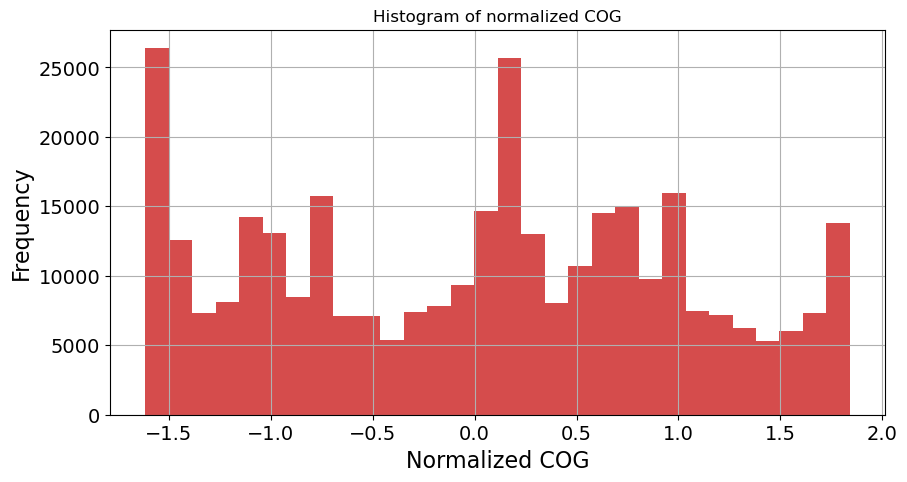

In [32]:
# Normalize COG
study_data['COG_norm'] = (study_data['COG'] - study_data['COG'].mean(axis = 0)) / study_data['COG'].std(axis = 0)

# Make histogram of normalized COG
study_data['COG_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized COG', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized COG', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['COG_norm'] = ((study_data['COG_norm'] - study_data['COG_norm'].min(axis=0)) / 
                           (study_data['COG_norm'].max(axis = 0) - study_data['COG_norm'].min(axis=0)))

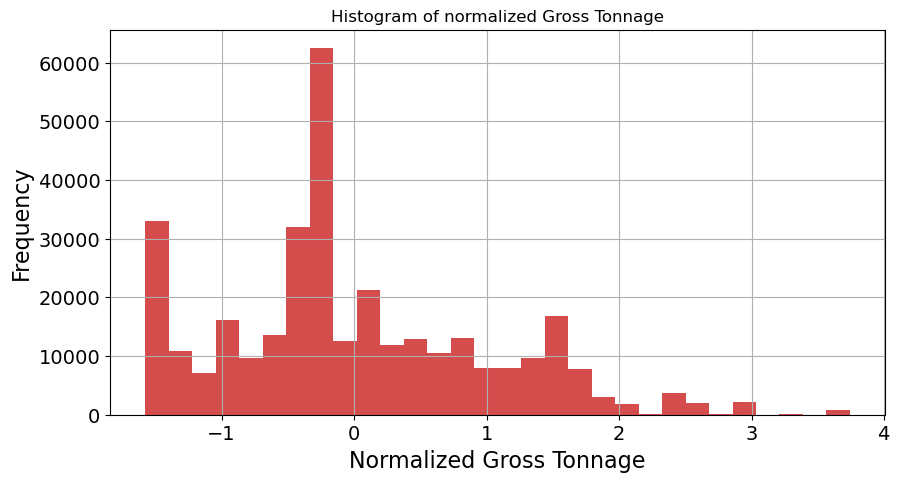

In [33]:
# Normalize Gross Tonnage
study_data['GrossTonnage_norm'] = (study_data['GrossTonnage'] - study_data['GrossTonnage'].mean(axis = 0)) / study_data['GrossTonnage'].std(axis = 0)

# Make histogram of normalized Gross Tonnage
study_data['GrossTonnage_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Gross Tonnage', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Gross Tonnage', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['GrossTonnage_norm'] = ((study_data['GrossTonnage_norm'] - study_data['GrossTonnage_norm'].min(axis=0)) / 
                                    (study_data['GrossTonnage_norm'].max(axis = 0) - study_data['GrossTonnage_norm'].min(axis=0)))

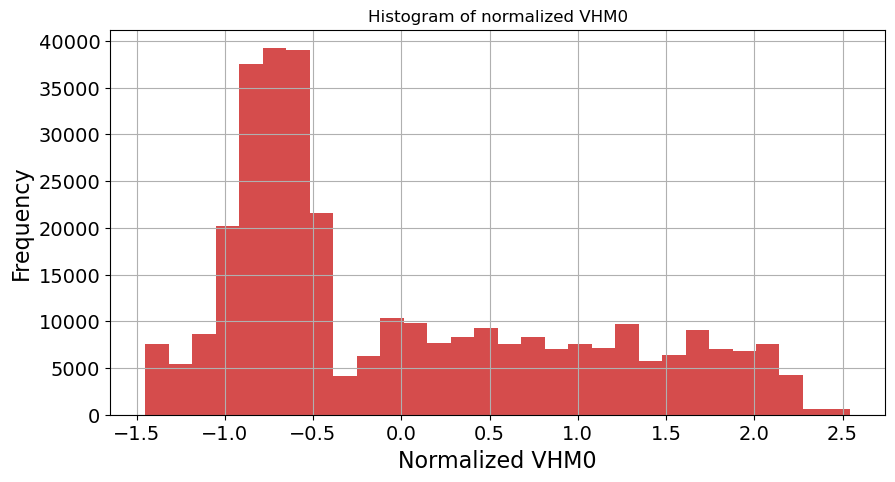

In [34]:
# Normalize VHM0
study_data['VHM0_norm'] = (study_data['VHM0'] - study_data['VHM0'].mean(axis = 0)) / study_data['VHM0'].std(axis = 0)

# Make histogram of normalized VHM0
study_data['VHM0_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VHM0', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VHM0', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Remove VHM0 outliers
study_data = study_data[(study_data['VHM0_norm'] > -2)].dropna()

# Standardize to 0 to 1
study_data['VHM0_norm'] = ((study_data['VHM0_norm'] - study_data['VHM0_norm'].min(axis=0)) / 
                            (study_data['VHM0_norm'].max(axis = 0) - study_data['VHM0_norm'].min(axis=0)))

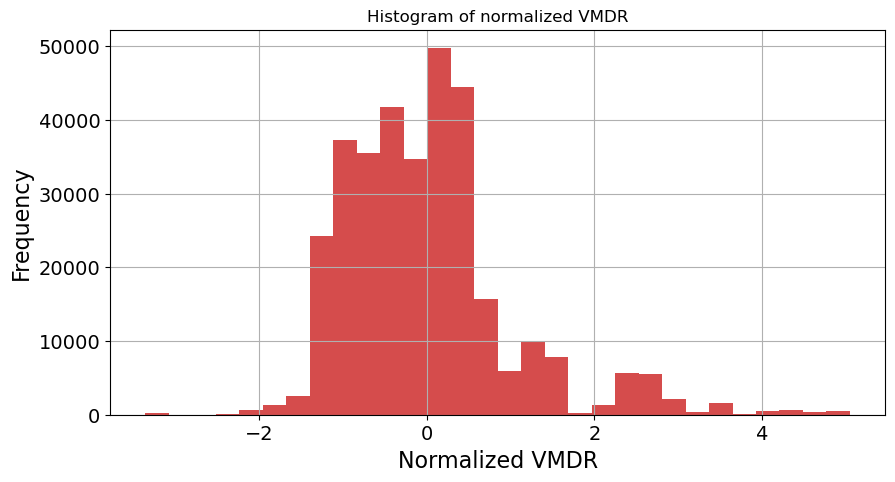

In [35]:
# Normalize VMDR
study_data['VMDR_norm'] = (study_data['VMDR'] - study_data['VMDR'].mean(axis = 0)) / study_data['VMDR'].std(axis = 0)

# Make histogram of normalized VMDR
study_data['VMDR_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VMDR', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VMDR', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['VMDR_norm'] = ((study_data['VMDR_norm'] - study_data['VMDR_norm'].min(axis=0)) / 
                            (study_data['VMDR_norm'].max(axis = 0) - study_data['VMDR_norm'].min(axis=0)))

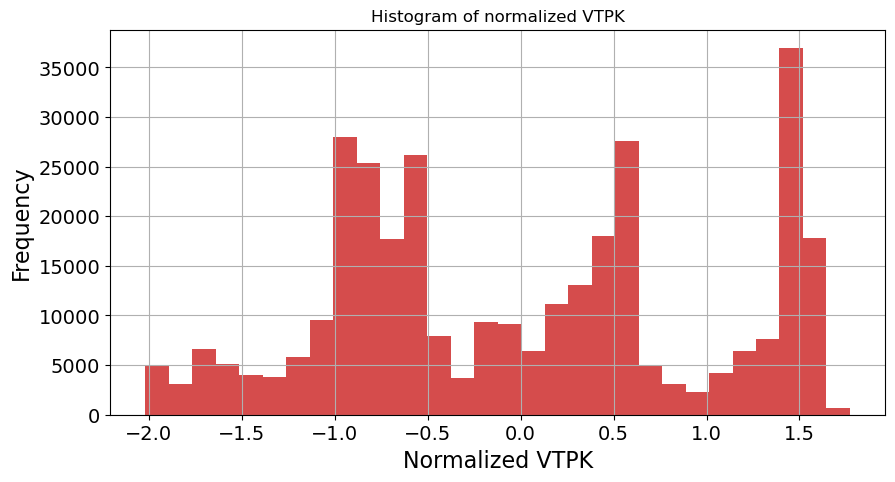

In [36]:
# Normalize VTPK
study_data['VTPK_norm'] = (study_data['VTPK'] - study_data['VTPK'].mean(axis = 0)) / study_data['VTPK'].std(axis = 0)

# Make histogram of normalized VTPK
study_data['VTPK_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized VTPK', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized VTPK', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['VTPK_norm'] = ((study_data['VTPK_norm'] - study_data['VTPK_norm'].min(axis=0)) / 
                            (study_data['VTPK_norm'].max(axis=0) - study_data['VTPK_norm'].min(axis=0)))

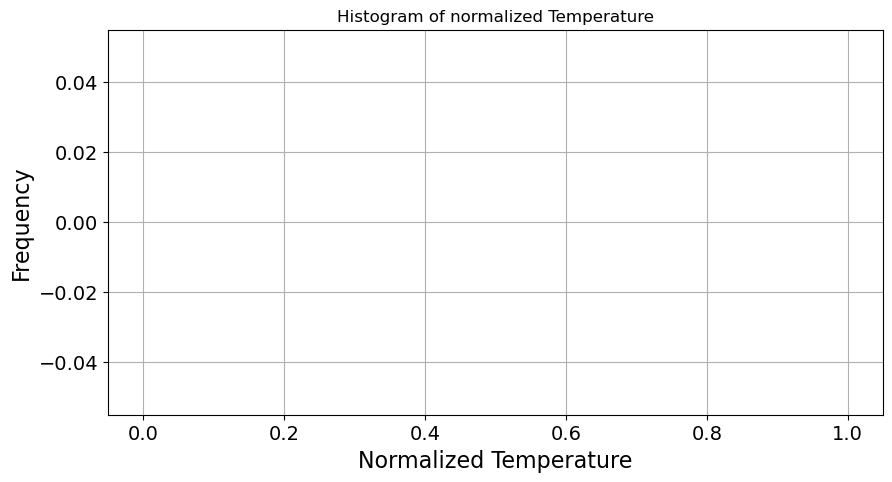

In [37]:
# Normalize Temperature
study_data['Temperature_norm'] = (study_data['Temperature'] - study_data['Temperature'].mean(axis = 0)) / study_data['Temperature'].std(axis = 0)

# Make histogram of normalized Temperature
study_data['Temperature_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Temperature', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Temperature', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Temperature_norm'] = ((study_data['Temperature_norm'] - study_data['Temperature_norm'].min(axis=0)) / 
                                   (study_data['Temperature_norm'].max(axis = 0) - study_data['Temperature_norm'].min(axis=0)))

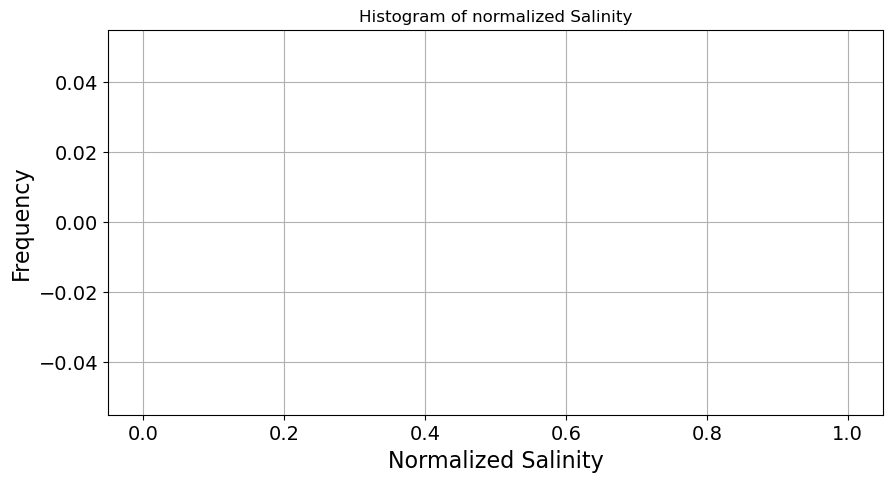

In [38]:
'''# Normalize Salinity
study_data['Salinity_norm'] = (study_data['Salinity'] - study_data['Salinity'].mean(axis = 0)) / study_data['Salinity'].std(axis = 0)

# Make histogram of normalized Salinity
study_data['Salinity_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Salinity', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Salinity', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Salinity_norm'] = ((study_data['Salinity_norm'] - study_data['Salinity_norm'].min(axis=0)) / 
                               (study_data['Salinity_norm'].max(axis=0) - study_data['Salinity_norm'].min(axis=0)))'''

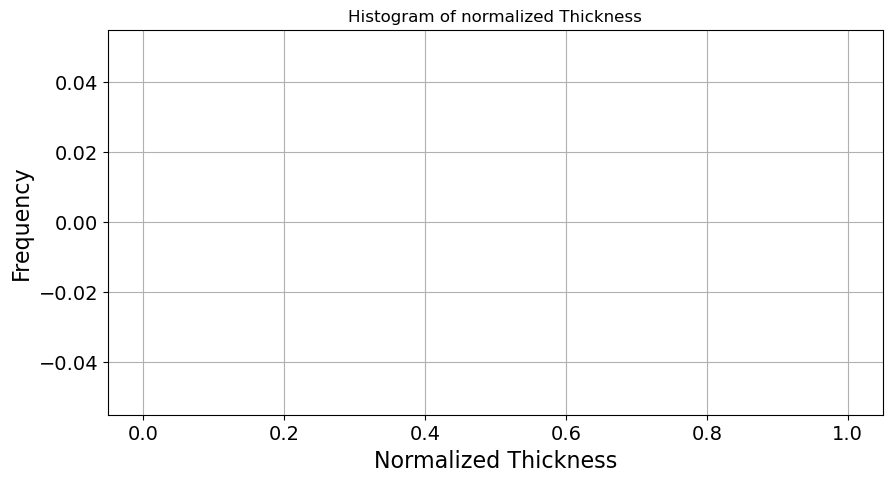

In [39]:
'''# Normalize Thickness
study_data['Thickness_norm'] = (study_data['Thickness'] - study_data['Thickness'].mean(axis = 0)) / study_data['Thickness'].std(axis = 0)

# Make histogram of normalized Thickness
study_data['Thickness_norm'].plot(kind = 'hist', alpha = 0.7, bins = 30, title = 'Histogram of normalized Thickness', 
                            grid = True, figsize = (10,5), fontsize = 14, color = ['#C40000'])
plt.xlabel('Normalized Thickness', fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

# Standardize to 0 to 1
study_data['Thickness_norm'] = ((study_data['Thickness_norm'] - study_data['Thickness_norm'].min(axis=0)) / 
                               (study_data['Thickness_norm'].max(axis=0) - study_data['Thickness_norm'].min(axis=0)))'''

In [41]:
print("After preprocessing...")
final_data = study_data.filter(['EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm', 'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'VTPK_norm'])
final_data = final_data.dropna()
final_data.to_csv('/kaggle/working/preprocessed_data.csv')
final_data

After preprocessing...


,EstimatedTime,LAT,LON,Heading,COG_norm,GrossTonnage_norm,VHM0_norm,VMDR_norm,VTPK_norm
0,23-01-01 00:00:00,28.28428,-79.63630,2.0,0.002222,0.490541,0.470990,0.277117,0.928495
1,23-01-01 00:00:00,25.88697,-80.05251,182.0,0.512222,0.014649,0.136519,0.338297,0.270011
2,23-01-01 00:00:00,41.79507,-87.44634,208.0,0.579167,0.160723,0.034130,0.004342,0.125934
3,23-01-01 00:00:00,24.02975,-81.70948,89.0,0.259167,0.245103,0.245734,0.262115,0.304162
4,23-01-01 00:00:00,23.87015,-83.77240,104.0,0.287500,0.564122,0.204778,0.322237,0.394877
...,...,...,...,...,...,...,...,...,...
373403,23-04-01 23:01:00,25.51555,-79.53770,183.0,0.502500,0.567973,0.133106,0.458736,0.382070
373404,23-04-01 23:01:00,25.71019,-83.15791,1.0,0.009444,0.210196,0.177474,0.484176,0.287086
373405,23-04-01 23:01:00,29.39362,-80.81100,178.0,0.499167,0.065629,0.290102,0.273666,0.940235
373406,23-04-01 23:01:00,25.50736,-79.53787,183.0,0.503333,0.567973,0.133106,0.458736,0.382070
